In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [62]:
data = pd.read_csv ('/Users/havvadogan/Desktop/python_intro/electricity_dah_prices.csv')
df = data
df.head()

,date,hour,france,italy,belgium,spain,uk,germany
0,2022/01/01,00:00 - 01:00,89.06,170.28,82.02,145.86,0.27,50.05
1,2022/01/01,01:00 - 02:00,78.48,155.72,67.07,114.90,-0.01,41.33
2,2022/01/01,02:00 - 03:00,85.16,147.09,75.11,113.87,0.27,43.22
3,2022/01/01,03:00 - 04:00,50.00,91.00,50.91,97.80,-0.01,45.46
4,2022/01/01,04:00 - 05:00,37.67,104.00,37.67,97.80,-0.01,37.67


In [63]:
df['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')

In [64]:
missing_values = df.isnull()
missing_values_count = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Create a new DataFrame to display the results
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage (%)': missing_values_percentage
})

print(missing_data_summary)

         Missing Values  Percentage (%)
date                  0        0.000000
hour                  0        0.000000
france                1        0.011414
italy                 1        0.011414
belgium               1        0.011414
spain                 1        0.011414
uk                 1442       16.459308
germany               1        0.011414


In [65]:
numeric_columns = ['france', 'italy', 'belgium', 'spain', 'germany']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

df.drop(columns=['uk'], inplace=True)

print(df.isnull().sum())

date       0
hour       0
france     0
italy      0
belgium    0
spain      0
germany    0
dtype: int64


In [66]:
column_names = df.columns.tolist()
for column in column_names:
    print(column)

date
hour
france
italy
belgium
spain
germany


In [67]:
df.head(10)

,date,hour,france,italy,belgium,spain,germany
0,2022-01-01,00:00 - 01:00,89.06,170.28,82.02,145.86,50.05
1,2022-01-01,01:00 - 02:00,78.48,155.72,67.07,114.90,41.33
2,2022-01-01,02:00 - 03:00,85.16,147.09,75.11,113.87,43.22
3,2022-01-01,03:00 - 04:00,50.00,91.00,50.91,97.80,45.46
4,2022-01-01,04:00 - 05:00,37.67,104.00,37.67,97.80,37.67
5,2022-01-01,05:00 - 06:00,39.70,140.60,39.70,95.74,39.70
6,2022-01-01,06:00 - 07:00,40.59,147.09,40.59,97.80,40.59
7,2022-01-01,07:00 - 08:00,43.26,99.99,43.26,97.80,43.26
8,2022-01-01,08:00 - 09:00,49.66,67.99,49.66,97.80,49.66
9,2022-01-01,09:00 - 10:00,70.05,95.00,70.05,70.05,70.05


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     8761 non-null   datetime64[ns]
 1   hour     8761 non-null   object        
 2   france   8761 non-null   float64       
 3   italy    8761 non-null   float64       
 4   belgium  8761 non-null   float64       
 5   spain    8761 non-null   float64       
 6   germany  8761 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 479.2+ KB


In [69]:
df.describe()

,france,italy,belgium,spain,germany
count,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000
mean,275.878425,307.581382,244.531733,167.521917,235.446143
std,145.817399,136.952039,134.649621,69.437386,142.801257
min,-1.440000,1.000000,-100.000000,0.000000,-19.040000
25%,183.040000,211.880000,157.720000,125.000000,134.210000
50%,239.340000,266.680000,219.830000,163.550000,208.370000
75%,350.000000,385.000000,315.050000,206.400000,310.080000
max,2987.780000,871.000000,871.000000,700.000000,871.000000


In [70]:
df1[countries].corr()

,france,italy,belgium,spain,germany
france,1.000000,0.905206,0.871286,0.210219,0.859217
italy,0.905206,1.000000,0.845695,0.131930,0.844505
belgium,0.871286,0.845695,1.000000,0.218180,0.954275
spain,0.210219,0.131930,0.218180,1.000000,0.171934
germany,0.859217,0.844505,0.954275,0.171934,1.000000


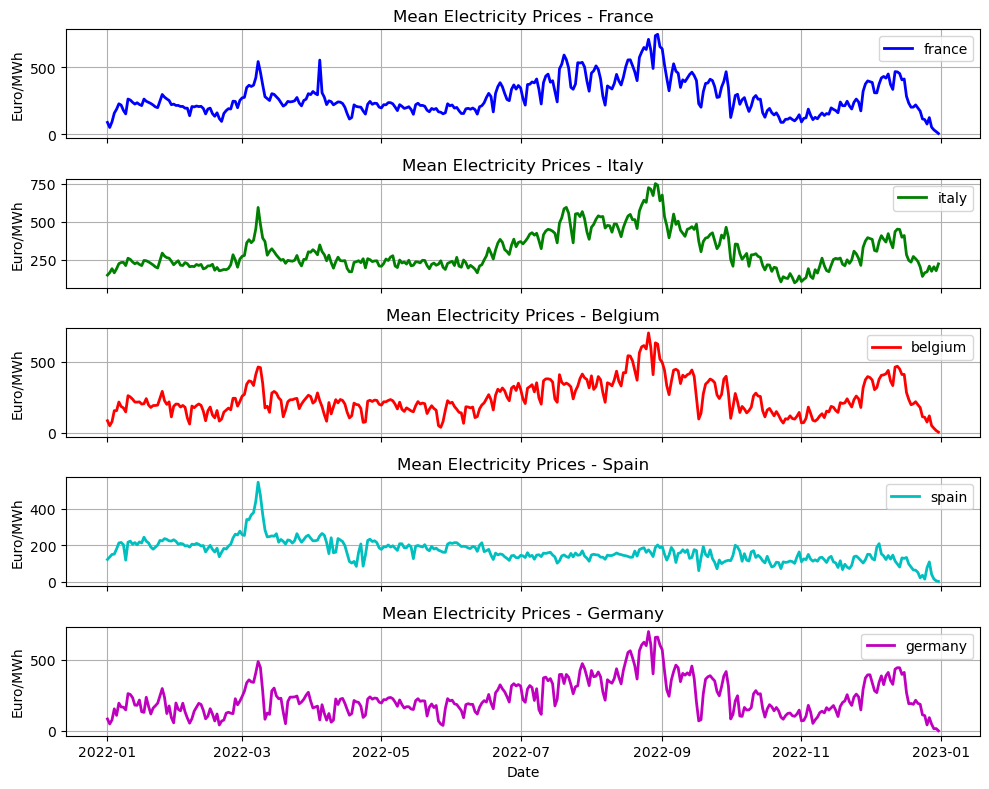

In [71]:
def plot_mean_by_date(df, country, color, ax):
    mean_by_date = df.groupby("date")[country].mean()
    ax.plot(mean_by_date, label=country, linewidth=2, color=color)

def main():
    
    countries = ['france', 'italy', 'belgium', 'spain', 'germany']
    num_countries = len(countries)
    colors = ['b', 'g', 'r', 'c', 'm']  # Define distinct colors for each country

    fig, axes = plt.subplots(num_countries, 1, figsize=(10, 8), sharex=True)

    for i, country in enumerate(countries):
        plot_mean_by_date(data, country, colors[i], axes[i])
        axes[i].set_ylabel('Euro/MWh')
        axes[i].set_title(f'Mean Electricity Prices - {country.capitalize()}')
        axes[i].grid(True)
        axes[i].legend(loc='upper right')

    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


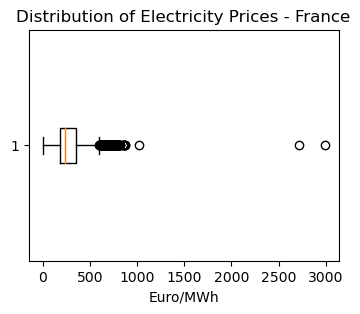

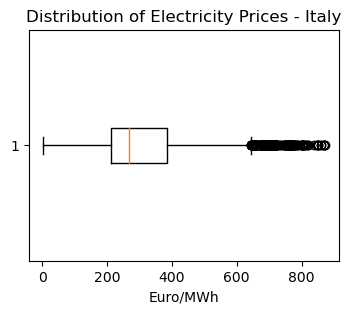

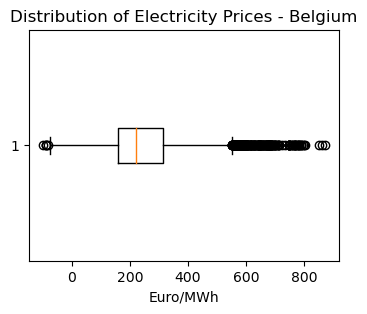

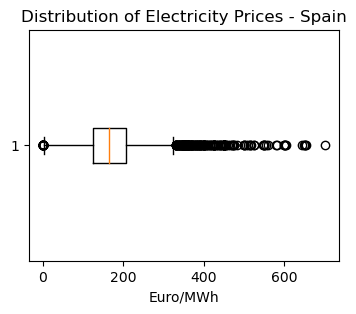

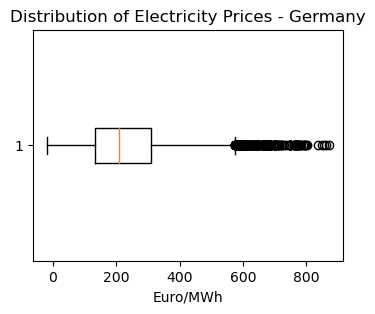

In [72]:
def plot_boxplot(df, country):
    plt.figure(figsize=(4, 3))
    plt.boxplot(df[country], vert=False)
    plt.title(f'Distribution of Electricity Prices - {country.capitalize()}')
    plt.xlabel('Euro/MWh')
    plt.show()

def main():  
    
    countries = ['france', 'italy', 'belgium', 'spain', 'germany']

    for country in countries:
        plot_boxplot(data, country)

if __name__ == "__main__":
    main()



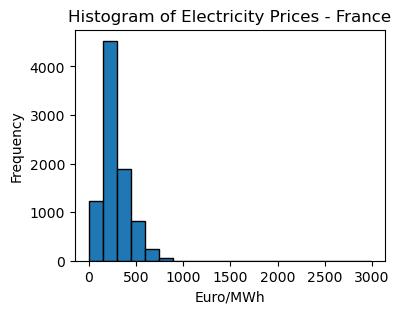

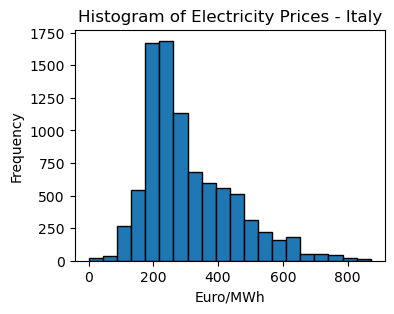

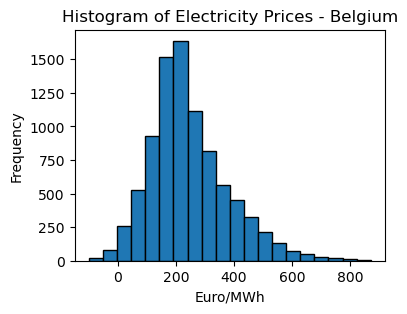

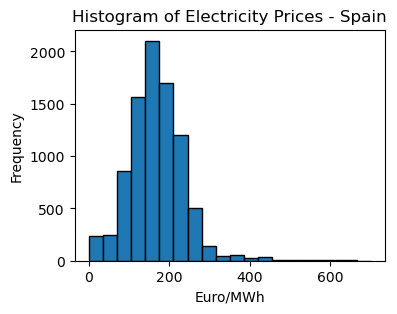

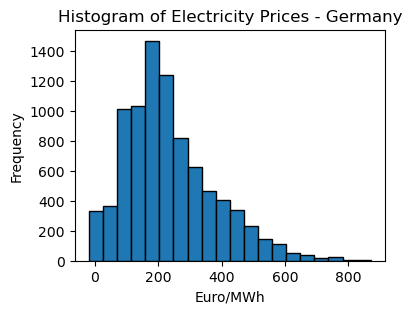

In [73]:
def plot_histogram(df, country):
    plt.figure(figsize=(4, 3))
    plt.hist(df[country], bins=20, edgecolor='black')
    plt.title(f'Histogram of Electricity Prices - {country.capitalize()}')
    plt.xlabel('Euro/MWh')
    plt.ylabel('Frequency')
    plt.show()

def main():
    
    countries = ['france', 'italy', 'belgium', 'spain', 'germany']

    for country in countries:
        plot_histogram(data, country)

if __name__ == "__main__":
    main()


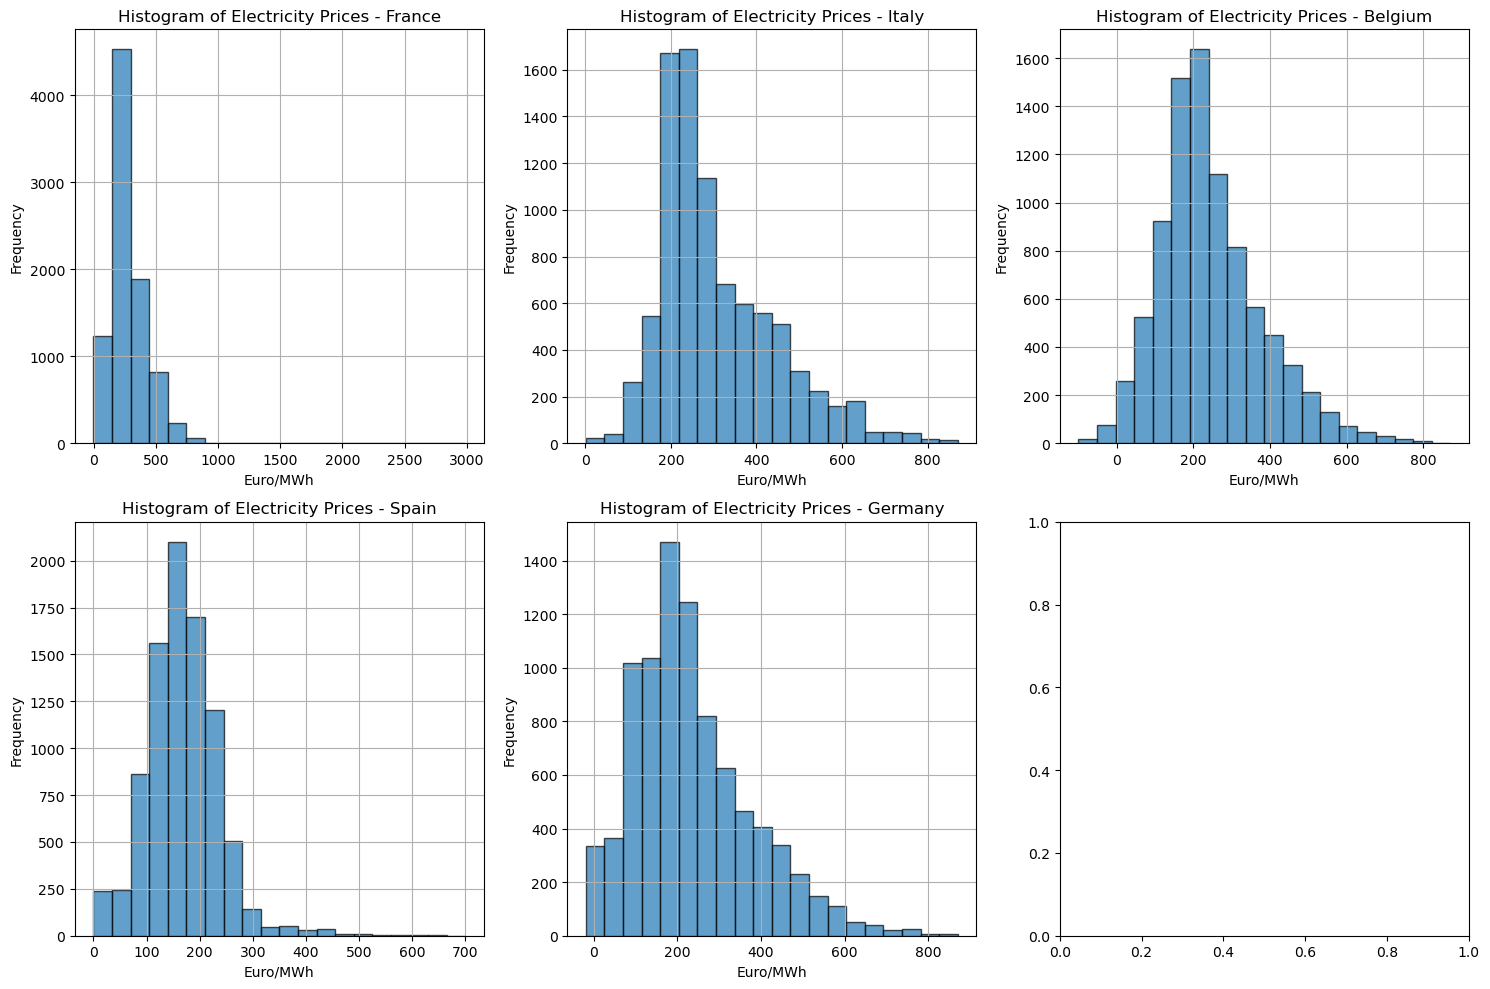

In [74]:
def plot_histogram(df, country, ax):
    ax.hist(df[country], bins=20, alpha=0.7, edgecolor='black')
    ax.set_title(f'Histogram of Electricity Prices - {country.capitalize()}')
    ax.set_xlabel('Euro/MWh')
    ax.set_ylabel('Frequency')

def main():
    countries = ['france', 'italy', 'belgium', 'spain', 'germany']
    num_rows = 2
    num_cols = 3

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            if idx < len(countries):
                plot_histogram(data, countries[idx], axes[i, j])
                axes[i, j].grid(True)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


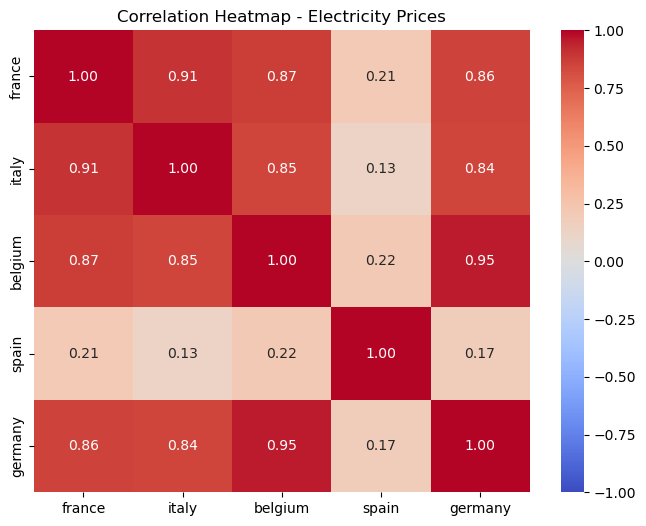

In [75]:
def main():
    
    countries = ['france', 'italy', 'belgium', 'spain', 'germany']
    correlation_data = data[countries]

    # Calculate the correlation matrix
    correlation_matrix = correlation_data.corr()

    # Set up the correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap - Electricity Prices')
    plt.show()

if __name__ == "__main__":
    main()

##
Findings:

Correlation Analysis:

There is a strong positive correlation between electricity prices in Italy, France, and Belgium, indicating that these countries' electricity prices tend to move in the same direction.
Spain, on the other hand, exhibits a separate trend with weaker correlations to the other countries' electricity prices.



Average Electricity Prices:

Italy has the highest average electricity prices among the analyzed countries, indicating that it generally experiences higher electricity costs compared to the rest.
France follows Italy with the second-highest average electricity prices, showing a similar pricing trend but at a slightly lower level.
Spain has the lowest average electricity prices, suggesting a comparatively more affordable electricity market.